**Aggregating Keywords**

In [4]:
from collections import Counter

def aggregate_keywords(all_keywords):
    all_words=[]
    for keywords_in_text in all_keywords:
        all_words.extend([word for word,count in keywords_in_text])
    return Counter(all_words)

#Sample 
all_keywords = [
    [('python', 2), ('database', 1), ('interesting', 1), ('hello', 1), ('basics', 1)],
    [('data', 1), ('science', 1), ('machine', 1), ('learning', 1), ('ai', 1)],
    [('web', 1), ('development', 1), ('html', 1), ('css', 1), ('javascript', 1)],
    [('course', 1), ('lost', 1), ('advanced', 1), ('topic', 1), ('deep', 1)],
    [('python', 1), ('paybills', 1)]
]

aggregate_counts = aggregate_keywords(all_keywords)
print("Aggregate keywords Counts :", aggregate_counts.most_common(20))

Aggregate keywords Counts : [('python', 2), ('database', 1), ('interesting', 1), ('hello', 1), ('basics', 1), ('data', 1), ('science', 1), ('machine', 1), ('learning', 1), ('ai', 1), ('web', 1), ('development', 1), ('html', 1), ('css', 1), ('javascript', 1), ('course', 1), ('lost', 1), ('advanced', 1), ('topic', 1), ('deep', 1)]


**Presenting the Summary:**
there are several ways to present the summarized keywords data:

- Top N Keywords : Simple display the most frequent keywords and their counts. This is often the most concise and informative summary.

In [5]:
top_n =10
top_keywords = aggregate_counts.most_common(top_n)
print(f"Top {top_n} Keywords:")
for keywords in top_keywords:
    print(f"- {keywords}")

Top 10 Keywords:
- ('python', 2)
- ('database', 1)
- ('interesting', 1)
- ('hello', 1)
- ('basics', 1)
- ('data', 1)
- ('science', 1)
- ('machine', 1)
- ('learning', 1)
- ('ai', 1)


- Word Clouds : A visual representation of keyword frequencies, Where the size of each word corresponds to its frequency.

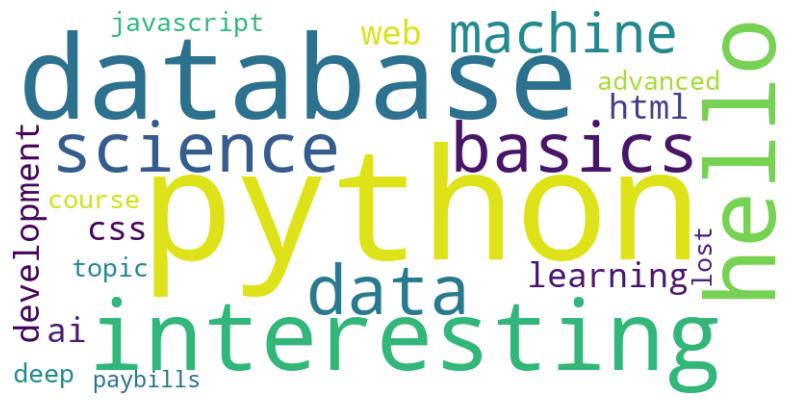

In [8]:
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800,height=400,background_color='white').generate_from_frequencies(aggregate_counts)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

- Keyword Categories/Themes (more advanced): If you want a more structured summary, you can try to group keywords into categories or themes. this can be done using techniques like:
    - Clustering: Group similar keywords based on semantic similarity(eg. using word embeddings)
    - Topic Modeling (LDA,etx.): discover underlying topics in the text and associate keywords with those topics.

**Clustering (Sementic Similarity):**

Clustering groups similar keywords based on their sementic meaning, often word embeddings (word vectors).

- Word Embeddings: These are dense vector representation of words that capture semantic relationships. Words with similar meanings are located closer to each other in the vector spaces.
Popular word embeddings include Word2Vec, GloVe, and FastText. spaCy also provide built in word vectors for its larger language models (like en_core_web_lg).

- Clustering Algorithms: Common clustering algorithms used for keyword grouping include:
    - K-means: Partitions keywords into k clusters based on minimizing the distance to cluster centers.
    - DBSCAN (Density Based Spatial clustering of Application with Noise): Groups together closely packed keywords, making as outliner keywords that lie alone in low-density regions.
    - Agglomerative Clustering (Hierarchical Clustering): Builts a hierarchy of clusters bu successively merging the closest clusters.

**Example (using spaCy and K-Means):**

In [ ]:
import spacy
from sklearn.cluster import KMeans
import numpy as np

nlp = spacy.load("en_core_web_lg")

def cluster_keywords(Keywords, n_clusters=5):
    keyword_vectors = [nlp(keyword).vector for keyword in keywords]
    keyword_vectors = np.array(keyword_vectors)

    kmeans = KMeans(n_clusters=n_clusters,random_state=42,n_init=10)
    kmeans.fit(keyword_vectors)

    clusters = {}
    for i,label in enumerate(kmeans, labels_):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(keywords[i])
    return clusters

keywords = ["python", "programming", "coding", "data", "science", "analysis", "machine", "learning", "algorithm", "network", "web", "html", "css", "javascript"]

clusters = cluster_keywords(keywords)
for label, cluster_keywords in clusters.items():
    print(f"Cluster {label}: {cluster_keywords}")

**Topic Modeling**

Topic Modeling discovers abstract "topics" that occurs in a collection of documents. Each topic is a distribution over words, and each document is a mixture of topics.

- LDA (Lateral dirichlet Allocation):
    - Core Idea: LDA assumes that documents are mixtures of topics, and each topic is a distribution over words. It tries to find these hidden (latent) topics by analyzing the word co-occurrence patterns in the documents.
    - How it works :
        - It starts by randomly assigning each word in each document to a topic.
        - It then iteratively reassigns each word to a topic based on two probabilities:
            -The probability that the word belongs to a particular topic.
            - The probability that a document contains that particular topic.
        -This iterative process continues until the topic assignments stabilize.
    - Output:
        - Topics: Each topic is represented as a probability distribution over words (e.g., Topic 1: "data" (0.3), "science" (0.2), "analysis" (0.15), ...).
        - Document-Topic Distributions: Each document is represented as a probability distribution over topics (e.g., Document 1: Topic 1 (0.6), Topic 2 (0.3), Topic 3 (0.1), ...).

- LSI/LSA (Latent Sematic Indexing/Analysis):
    - Core Idea: LSI uses Singular Value Decomposition (SVD) to reduce the dimensionality of the term-document matrix (a matrix where rows are terms and columns are documents). This dimensionality reduction reveals latent semantic relationships between words and documents.
    - how it works:
        - Creates a term-document matrix.
        - Applies SVD to decompose the matrix into three matrices: U, Σ, and V.
        - The reduced-rank matrices U and V represent the latent semantic space.
    - Output: 
        - Topics: Represented as vectors in the latent semantic space.
        - Document representations: Also represented as vectors in the same space.

- NMF (non-negative Matrix factorization):
    - Core Idea: NMF is another matrix factorization technique that decomposes the term-document matrix into two non-negative matrices. This non-negativity constraint often leads to more interpretable topics.

    - How it works : 
        - Creates a term-document matrix.
        - Factorizes the matrix into two non-negative matrices W and H. 
    -output :
        - Similar to LSI, topics are represented as vectors.

- BERTopic:
    - Core Idea: BERTopic combines transformer-based language models (like BERT) with clustering techniques (HDBSCAN is commonly used). It leverages the powerful contextualized word embeddings from transformers to create more coherent and meaningful topics.

    - how it works:
        - Uses a transformer model (e.g., Sentence-BERT) to generate embeddings for each document.
        - Applies a dimensionality reduction technique (e.g., UMAP) to reduce the dimensionality of the embeddings.
        - Clusters the reduced embeddings using HDBSCAN (or another clustering algorithm).
        - Represents each topic by the most frequent words in the documents belonging to that cluster.

    - output:
        - Topics: Represented by a set of words that are most characteristic of the topic.
        - Document-Topic Assignments: Each document is assigned to a specific topic.

In [ ]:
import nltk
import spacy
import gensim
from gensim import corpora
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from bertopic import BERTopic
import matplotlib.pyplot as plt

# Download NLTK resources (do this once)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# Load spaCy
nlp = spacy.load("en_core_web_lg")  # Use a larger model for word vectors

# Sample texts (replace with your actual data)
texts = [
    "Python programming is fun and useful for data science.",
    "Machine learning algorithms are used in many applications.",
    "Web development involves HTML, CSS, and JavaScript.",
    "Data analysis is important for business decisions.",
    "Deep learning is a subfield of machine learning.",
    "Natural language processing is a part of artificial intelligence.",
    "Software development is a broad field with many specializations.",
    "Cloud computing is changing the way we store and access data.",
    "Cybersecurity is crucial for protecting sensitive information.",
    "Databases are essential for managing large amounts of data.",
]

# 1. LDA (Latent Dirichlet Allocation)
def topic_modeling_lda(texts, num_topics=3):
    tokenized_texts = [text.split() for text in texts]
    dictionary = corpora.Dictionary(tokenized_texts)
    corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

    lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)
    return lda_model, dictionary

lda_model, dictionary = topic_modeling_lda(texts)
print("\nLDA Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

# 2. LSI/LSA (Latent Semantic Indexing/Analysis)
def topic_modeling_lsi(texts, num_topics=3):
    tokenized_texts = [text.split() for text in texts]
    dictionary = corpora.Dictionary(tokenized_texts)
    corpus = [dictionary.doc2bow(text) for text in tokenized_texts]
    tfidf = gensim.models.TfidfModel(corpus)
    corpus_tfidf = tfidf[corpus]
    lsi_model = gensim.models.LsiModel(corpus_tfidf, num_topics=num_topics, id2word=dictionary)
    return lsi_model, dictionary

lsi_model, dictionary = topic_modeling_lsi(texts)
print("\nLSI Topics:")
for idx, topic in lsi_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

# 3. NMF (Non-negative Matrix Factorization)
def topic_modeling_nmf(texts, num_topics=3):
    vectorizer = TfidfVectorizer(stop_words='english') #NMF needs numeric input
    doc_term_matrix = vectorizer.fit_transform(texts)
    nmf_model = NMF(n_components=num_topics, random_state=42)
    nmf_model.fit(doc_term_matrix)
    feature_names = vectorizer.get_feature_names_out()
    print("\nNMF Topics:")
    for topic_idx, topic in enumerate(nmf_model.components_):
        top_words_idx = topic.argsort()[:-11:-1] #get the top 10 words
        top_words = [feature_names[i] for i in top_words_idx]
        print(f"Topic {topic_idx}: {' '.join(top_words)}")
    return nmf_model, vectorizer

nmf_model, vectorizer = topic_modeling_nmf(texts)

# 4. BERTopic
!pip install bertopic
def topic_modeling_bertopic(texts):
    topic_model = BERTopic()
    topics, probabilities = topic_model.fit_transform(texts)
    print("\nBERTopic Topics:")
    topic_model.print_topics()
    return topic_model

bertopic_model = topic_modeling_bertopic(texts)

# 5. Clustering (K-Means with spaCy embeddings)
def cluster_keywords(keywords, n_clusters=3):
    keyword_vectors = [nlp(keyword).vector for keyword in keywords]
    keyword_vectors = np.array(keyword_vectors)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(keyword_vectors)

    clusters = {}
    for i, label in enumerate(kmeans.labels_):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(keywords[i])
    return clusters

keywords = ["python", "programming", "coding", "data", "science", "analysis", "machine", "learning", "algorithm", "network", "web", "html", "css", "javascript", "cloud", "computing", "cybersecurity", "databases"]
clusters = cluster_keywords(keywords)
print("\nK-Means Clusters:")
for label, cluster_keywords in clusters.items():
    print(f"Cluster {label}: {cluster_keywords}")